In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#load csv and print out the dataframe
df = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
print(df)

      id                                          job_title  \
0      1  2019 C.T. Bauer College of Business Graduate (...   
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location connection  fit  
0                         Houston, Texas         85  NaN  
1                                 Kanada      500+   NaN  
2    Raleigh-Durham, North Carolina Area         44  NaN  
3      

In [3]:
#perform EDA
print('head:\n', df.head())
print('shape:', df.shape)
print("missing values:\n", df.isnull().sum())
print('info', df.info())
print('describe', df.describe())

head:
    id                                          job_title  \
0   1  2019 C.T. Bauer College of Business Graduate (...   
1   2  Native English Teacher at EPIK (English Progra...   
2   3              Aspiring Human Resources Professional   
3   4             People Development Coordinator at Ryan   
4   5    Advisory Board Member at Celal Bayar University   

                              location connection  fit  
0                       Houston, Texas         85  NaN  
1                               Kanada      500+   NaN  
2  Raleigh-Durham, North Carolina Area         44  NaN  
3                        Denton, Texas      500+   NaN  
4                       İzmir, Türkiye      500+   NaN  
shape: (104, 5)
missing values:
 id              0
job_title       0
location        0
connection      0
fit           104
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ----

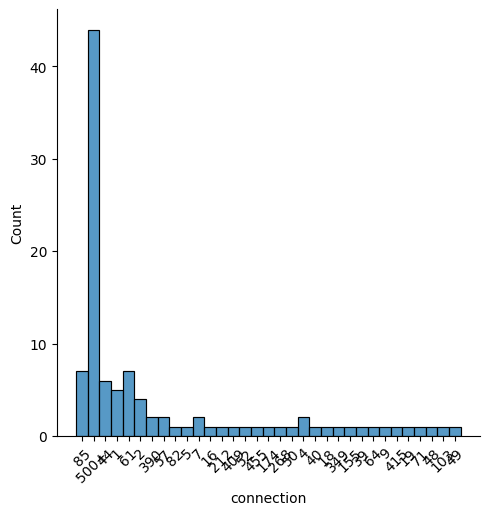

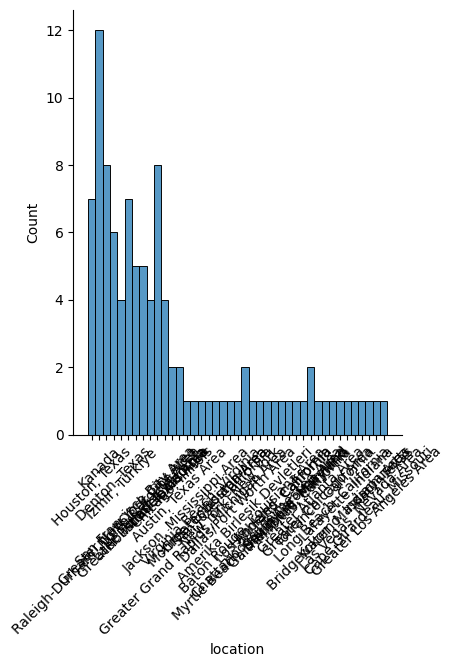

In [4]:
#distribution plot
sns.displot(df, x='connection')
plt.xticks(rotation=45)
#plt.bar(x=df.connection, height=df.connection, width=0.8)
plt.show()

sns.displot(df, x='location')
plt.xticks(rotation=45)
plt.show()

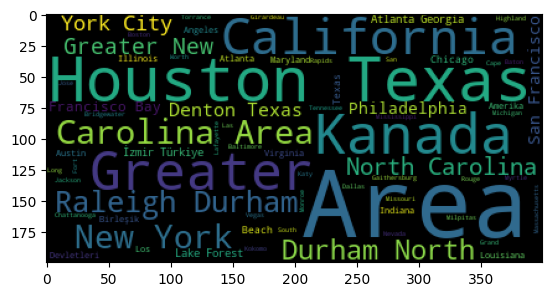

In [5]:
wc = WordCloud().generate(' '.join(df['location']))
plt.imshow(wc)

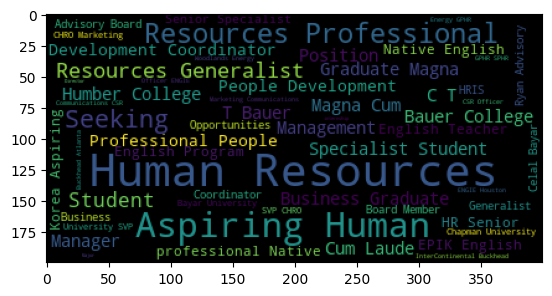

In [6]:
wc = WordCloud().generate(' '.join(df['job_title']))
plt.imshow(wc)

In [7]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(df.job_title)

# Get feature names to use as dataframe columns
feature_names = vectorizer.get_feature_names_out()

# Display the matrix
dfVector = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(dfVector)

         2019      2020  2621  408  709  about  administration  \
0    0.317019  0.000000   0.0  0.0  0.0    0.0        0.000000   
1    0.000000  0.000000   0.0  0.0  0.0    0.0        0.000000   
2    0.000000  0.000000   0.0  0.0  0.0    0.0        0.000000   
3    0.000000  0.000000   0.0  0.0  0.0    0.0        0.000000   
4    0.000000  0.000000   0.0  0.0  0.0    0.0        0.000000   
..        ...       ...   ...  ...  ...    ...             ...   
99   0.000000  0.307648   0.0  0.0  0.0    0.0        0.000000   
100  0.000000  0.000000   0.0  0.0  0.0    0.0        0.000000   
101  0.000000  0.000000   0.0  0.0  0.0    0.0        0.000000   
102  0.000000  0.000000   0.0  0.0  0.0    0.0        0.000000   
103  0.000000  0.000000   0.0  0.0  0.0    0.0        0.481892   

     administrative  admissions  advisory  ...        up  victoria  \
0               0.0         0.0  0.000000  ...  0.000000       0.0   
1               0.0         0.0  0.000000  ...  0.000000       0.0 

In [8]:
#df_vec = np.squeeze(np.asarray(df.job_title))
#df_arr = np.array(df_vec)
#def cosine_similarity(df_arr):
#    dot_product = np.dot(df_arr, df_arr.T)
#    magnitude = np.linagl.norm(df_arr)
#    return dot_product / (magnitude * magnitude)
#vector = [1, 2, 3]
#similarity = cosine_similarity(df_arr)
#print(similarity)

In [9]:
#df1.tolist()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

job_titles = df.job_title.tolist()

search_term = 'aspiring human resources'
#df2 = df.job_title

#df1 = df1.str.lower()
#df2 = df2.str.lower()

#df1['job_title'] = df1['job_title'].str.lower()
#df2['job_title'] = df2['job_title'].str.lower()
#df1.job_title = df1.job_title.str.lower()
#df2.job_title = df2.job_title.str.lower()
##vectorizer = CountVectorizer().fit_transform(jobtitles) #, df2.T])
##vectors = vectorizer.toarray()
##def cosine_sim(df1, df2):
##    return cosine_similarity(vectors)[0, 1]

#similarity = cosine_sim(df1, df2)
#print(similarity)

# Combine the search term with the job titles to fit the CountVectorizer
corpus = job_titles + [search_term]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the corpus to get the embedding matrix
embedding_matrix = vectorizer.fit_transform(corpus).toarray()

# The search term vector is the last row in the embedding matrix
search_term_vector = embedding_matrix[-1]

# Job title vectors are all rows except the last one
job_title_vectors = embedding_matrix[:-1]

# Calculate cosine similarity between the search term vector and each job title vector
similarities = cosine_similarity([search_term_vector], job_title_vectors).flatten()
##sorted_data_desc = sorted(job_titles, key=lambda row:similarities.all(), reverse=True)

# Create a list of job titles with their corresponding similarity scores
ranked_candidates = sorted(zip(job_titles, similarities), key=lambda x: x[1], reverse=True)

print("Ranked job titles based on similarity to the search term:")
for title, similarity in ranked_candidates:
    print(f"{title}: {similarity:.4f}")

Ranked job titles based on similarity to the search term:
Aspiring Human Resources Professional: 0.8660
Aspiring Human Resources Specialist: 0.8660
Aspiring Human Resources Professional: 0.8660
Aspiring Human Resources Professional: 0.8660
Aspiring Human Resources Specialist: 0.8660
Aspiring Human Resources Professional: 0.8660
Aspiring Human Resources Specialist: 0.8660
Aspiring Human Resources Professional: 0.8660
Aspiring Human Resources Specialist: 0.8660
Aspiring Human Resources Professional: 0.8660
Aspiring Human Resources Specialist: 0.8660
Aspiring Human Resources Professional: 0.8660
Aspiring Human Resources Manager, seeking internship in Human Resources.: 0.8006
Human Resources Professional: 0.6667
Liberal Arts Major. Aspiring Human Resources Analyst.: 0.6547
Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis: 0.6299
Aspiring Human Resources Management student seeking an internship: 0.6124
Aspiring Human Resou

In [11]:
#from scipy.sparse import csr_matrix
#from sklearn.preprocessing import StandardScaler
##from collections import Counter
##from math import sqrt

#sparse_matrix = searchterm
#dense_array = np.array(sparse_matrix)
#vector = pd.DataFrame(vectorizer)
#searchterm_vector = vector.transform([dense_array])#([searchterm])
##jobtitles.append(searchterm)
#vectorizer_new = CountVectorizer().fit_transform(jobtitles)

#def cos_similarity(x,y):
#  numerator = sum(a*b for a,b in zip(x,y))
#  denominator = squared_sum(x)*squared_sum(y)
#  return round(numerator/float(denominator),3)

#cos_similarity(embeddings[0], embeddings[1])
#from sklearn.metrics.pairwise import cosine_similarity
#df_cos = pd.DataFrame(cosine_similarity(jobtitles, dense_output=True))
#df_cos.head()
# Convert strings to character frequency vectors
##vec1 = Counter(jobtitles)
##vec2 = Counter(jobtitles)

# Calculating cosine similarity
##dot_product = sum(vec1[ch] * vec2[ch] for ch in vec1)
##magnitude1 = sqrt(sum(count ** 2 for count in vec1.values()))
##magnitude2 = sqrt(sum(count ** 2 for count in vec2.values()))
##res = dot_product / (magnitude1 * magnitude2)
##print(res)

In [12]:
searchterm = job_titles

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizerTFidf = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names to use as dataframe columns
feature_names = vectorizer.get_feature_names_out()

# Display the matrix
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(df)

     2019  2020  2621  408  709  about  administration  administrative  \
0       1     0     0    0    0      0               0               0   
1       0     0     0    0    0      0               0               0   
2       0     0     0    0    0      0               0               0   
3       0     0     0    0    0      0               0               0   
4       0     0     0    0    0      0               0               0   
..    ...   ...   ...  ...  ...    ...             ...             ...   
100     0     0     0    0    0      0               0               0   
101     0     0     0    0    0      0               0               0   
102     0     0     0    0    0      0               0               0   
103     0     0     0    0    0      0               1               0   
104     0     0     0    0    0      0               0               0   

     admissions  advisory  ...  up  victoria  wellington  western  westfield  \
0             0         0  ... 

In [14]:
# Fit and transform the corpus to get the embedding matrix
embedding_matrix = vectorizerTFidf.fit_transform(corpus).toarray()

# The search term vector is the last row in the embedding matrix
search_term_vector = embedding_matrix[-1]

# Job title vectors are all rows except the last one
job_title_vectors = embedding_matrix[:-1]

# Calculate cosine similarity between the search term vector and each job title vector
similarities = cosine_similarity([search_term_vector], job_title_vectors).flatten()
##sorted_data_desc = sorted(job_titles, key=lambda row:similarities.all(), reverse=True)

# Create a list of job titles with their corresponding similarity scores
ranked_candidates = sorted(zip(job_titles, similarities), key=lambda x: x[1], reverse=True)

print("Ranked job titles based on similarity to the search term:")
for title, similarity in ranked_candidates:
    print(f"{title}: {similarity:.4f}")

Ranked job titles based on similarity to the search term:
Aspiring Human Resources Professional: 0.7503
Aspiring Human Resources Professional: 0.7503
Aspiring Human Resources Professional: 0.7503
Aspiring Human Resources Professional: 0.7503
Aspiring Human Resources Professional: 0.7503
Aspiring Human Resources Professional: 0.7503
Aspiring Human Resources Professional: 0.7503
Aspiring Human Resources Specialist: 0.6923
Aspiring Human Resources Specialist: 0.6923
Aspiring Human Resources Specialist: 0.6923
Aspiring Human Resources Specialist: 0.6923
Aspiring Human Resources Specialist: 0.6923
Aspiring Human Resources Manager, seeking internship in Human Resources.: 0.5304
Human Resources Professional: 0.4590
Student at Humber College and Aspiring Human Resources Generalist: 0.3974
Student at Humber College and Aspiring Human Resources Generalist: 0.3974
Student at Humber College and Aspiring Human Resources Generalist: 0.3974
Student at Humber College and Aspiring Human Resources Gener

In [15]:
#!pip3 install gensim
#pip install -U gensim
#!pip uninstall gensim
!pip install gensim


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip show gensim

Name: gensim
Version: 4.3.3
Summary: Python framework for fast Vector Space Modelling
Home-page: https://radimrehurek.com/gensim/
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: C:\Users\bumbl\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: numpy, scipy, smart-open
Required-by: 


In [17]:
from gensim.models import Word2Vec
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = Word2Vec(sentences, min_count=1)

In [18]:
corpus_new=[['2019','C.T.','Bauer'],['Native','English','Teacher']]

In [19]:
corpus

['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
 'Native English Teacher at EPIK (English Program in Korea)',
 'Aspiring Human Resources Professional',
 'People Development Coordinator at Ryan',
 'Advisory Board Member at Celal Bayar University',
 'Aspiring Human Resources Specialist',
 'Student at Humber College and Aspiring Human Resources Generalist',
 'HR Senior Specialist',
 'Student at Humber College and Aspiring Human Resources Generalist',
 'Seeking Human Resources HRIS and Generalist Positions',
 'Student at Chapman University',
 'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR',
 'Human Resources Coordinator at InterContinental Buckhead Atlanta',
 '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
 '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professiona

In [20]:
corpusNew = []

for job_title in corpus:
    job_title = job_title.lower()
    job_title = job_title.replace('(','')
    job_title = job_title.replace(')','')
    job_title = job_title.replace('&','')
    job_title = job_title.replace('|','')
    job_title = job_title.replace(',','')
    job_title = job_title.replace('.','')
    job_title = job_title.replace('-','')
    job_title = job_title.replace('!','')
    job_title = job_title.replace("'",'')
    
    words = job_title.split()
    corpusNew.append(words)

print(corpusNew)

[['2019', 'ct', 'bauer', 'college', 'of', 'business', 'graduate', 'magna', 'cum', 'laude', 'and', 'aspiring', 'human', 'resources', 'professional'], ['native', 'english', 'teacher', 'at', 'epik', 'english', 'program', 'in', 'korea'], ['aspiring', 'human', 'resources', 'professional'], ['people', 'development', 'coordinator', 'at', 'ryan'], ['advisory', 'board', 'member', 'at', 'celal', 'bayar', 'university'], ['aspiring', 'human', 'resources', 'specialist'], ['student', 'at', 'humber', 'college', 'and', 'aspiring', 'human', 'resources', 'generalist'], ['hr', 'senior', 'specialist'], ['student', 'at', 'humber', 'college', 'and', 'aspiring', 'human', 'resources', 'generalist'], ['seeking', 'human', 'resources', 'hris', 'and', 'generalist', 'positions'], ['student', 'at', 'chapman', 'university'], ['svp', 'chro', 'marketing', 'communications', 'csr', 'officer', 'engie', 'houston', 'the', 'woodlands', 'energy', 'gphr', 'sphr'], ['human', 'resources', 'coordinator', 'at', 'intercontinental'

In [21]:
corpusNew[1]

['native',
 'english',
 'teacher',
 'at',
 'epik',
 'english',
 'program',
 'in',
 'korea']

In [22]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action='ignore')

model1 = gensim.models.Word2Vec(sentences=corpusNew, min_count=1, vector_size=100, window=3)

#print("Cosine similarity between 'Aspiring' " + "and 'human resources' - CBOW : ", model1.wv.similarity('Aspiring', 'human resources'))

In [23]:
#print(model1.wv)

In [24]:
model1.wv.index_to_key

['resources',
 'human',
 'at',
 'aspiring',
 'and',
 'professional',
 'student',
 'seeking',
 'generalist',
 'college',
 'university',
 'specialist',
 'of',
 'business',
 'english',
 'in',
 'coordinator',
 'humber',
 '2019',
 'laude',
 'cum',
 'magna',
 'graduate',
 'bauer',
 'ct',
 'manager',
 'senior',
 'hr',
 'management',
 'people',
 'ryan',
 'development',
 'an',
 'program',
 'the',
 'native',
 'epik',
 'teacher',
 'korea',
 'opportunities',
 'officer',
 'buckhead',
 'intercontinental',
 'sphr',
 'gphr',
 'energy',
 'woodlands',
 'atlanta',
 'houston',
 'engie',
 'member',
 'positions',
 'advisory',
 'board',
 'celal',
 'bayar',
 'hris',
 'csr',
 'chapman',
 'svp',
 'chro',
 'marketing',
 'communications',
 'for',
 'internship',
 'position',
 'director',
 'major',
 'a',
 'information',
 'systems',
 'leader',
 'to',
 'america',
 'north',
 'staffing',
 'retail',
 '7092621',
 '408',
 'inc',
 'professionals',
 'administrative',
 'payroll',
 'is',
 'nortia',
 'about',
 'helping',
 'pas

In [25]:
model1.wv["aspiring"]

array([-0.00842322,  0.00934546, -0.00024081, -0.00183742,  0.00454894,
       -0.00440407,  0.00279911,  0.00731719,  0.00583067, -0.0075627 ,
        0.00942301,  0.00448549,  0.00384616, -0.00611325,  0.00851765,
       -0.00209546,  0.00888024, -0.00551696, -0.00811864,  0.00654098,
        0.00191634, -0.00215094,  0.0096182 ,  0.00943166, -0.00977879,
        0.00260909,  0.00601475,  0.0039143 ,  0.00191394,  0.00040206,
        0.00087522, -0.00382579, -0.0069406 , -0.00227497,  0.00388908,
        0.00893019,  0.00939965, -0.00589706, -0.00953762,  0.00963951,
        0.00355276,  0.00503936,  0.00620271, -0.00274739,  0.00753922,
        0.00280577,  0.00274701, -0.00242507, -0.00294781, -0.00231629,
        0.00436909,  0.00011075, -0.00951521, -0.0096923 , -0.00616477,
       -0.00021946,  0.00206612,  0.00933838,  0.00555325, -0.00419046,
        0.00020811,  0.00501945,  0.00783438, -0.00112166,  0.00413507,
       -0.00562239, -0.00069482,  0.00838556, -0.0025723 , -0.00

In [26]:
corpusNew2 = []
for i in corpusNew:
    corpusNew2.append(i)
print(corpusNew2)

#corpusNew2 = df.corpusNew.tolist()
#print(corpusNew2)

[['2019', 'ct', 'bauer', 'college', 'of', 'business', 'graduate', 'magna', 'cum', 'laude', 'and', 'aspiring', 'human', 'resources', 'professional'], ['native', 'english', 'teacher', 'at', 'epik', 'english', 'program', 'in', 'korea'], ['aspiring', 'human', 'resources', 'professional'], ['people', 'development', 'coordinator', 'at', 'ryan'], ['advisory', 'board', 'member', 'at', 'celal', 'bayar', 'university'], ['aspiring', 'human', 'resources', 'specialist'], ['student', 'at', 'humber', 'college', 'and', 'aspiring', 'human', 'resources', 'generalist'], ['hr', 'senior', 'specialist'], ['student', 'at', 'humber', 'college', 'and', 'aspiring', 'human', 'resources', 'generalist'], ['seeking', 'human', 'resources', 'hris', 'and', 'generalist', 'positions'], ['student', 'at', 'chapman', 'university'], ['svp', 'chro', 'marketing', 'communications', 'csr', 'officer', 'engie', 'houston', 'the', 'woodlands', 'energy', 'gphr', 'sphr'], ['human', 'resources', 'coordinator', 'at', 'intercontinental'

In [27]:
def get_word_to_vectors(tokens):
    vectors = []
    for token in tokens:
        vector = model1.wv[token]
        vectors.append(vector)
    average_vectors = np.mean(vectors, axis=0)
    return average_vectors

In [28]:
search_term_tokens = search_term.split()

In [29]:
search_term_tokens

['aspiring', 'human', 'resources']

In [30]:
search_term_vector = get_word_to_vectors(search_term_tokens)

In [31]:
search_term_vector

array([-6.04632311e-03,  4.47651744e-03,  3.28491325e-03,  4.43039369e-03,
        8.64964910e-04, -6.26112195e-03,  3.51777766e-03,  8.01997352e-03,
       -9.53945972e-04, -5.84360352e-03,  5.39529510e-03, -2.17919308e-03,
       -2.28698319e-03,  2.81097088e-03,  2.35115387e-03,  1.15681544e-03,
        6.21374743e-03,  7.66117300e-04, -6.74572447e-03, -1.65185297e-03,
        4.12296457e-03, -4.51846659e-04,  8.32813233e-03,  1.11264235e-04,
        1.14840979e-03,  7.50657113e-04, -9.61435726e-05,  4.71296348e-03,
       -2.68601743e-03,  1.08907826e-03,  1.39575789e-03, -2.97677726e-03,
        9.24154825e-04, -5.35095716e-03,  1.65373727e-03,  3.51286191e-03,
        8.33057333e-03, -1.90900627e-03, -1.75055000e-04,  4.49214084e-03,
        6.62223727e-04,  8.76591541e-04, -4.02500527e-03, -2.27973680e-03,
        1.83179753e-03,  3.54138762e-03,  1.94101594e-04,  1.74304156e-03,
        1.43474713e-03,  3.06565408e-03,  1.46229321e-03, -1.65866350e-03,
       -4.57070535e-03, -

In [32]:
#Word2Vec

# The search term vector is the last row in the embedding matrix
search_term_vector = get_word_to_vectors(search_term_tokens)

# Job title vectors are all rows except the last one
job_title_vectors = []

for job_title in corpusNew2:
    job_title_vector = get_word_to_vectors(job_title)
    job_title_vectors.append(job_title_vector)

# Calculate cosine similarity between the search term vector and each job title vector
similarities = cosine_similarity([search_term_vector], job_title_vectors).flatten()
##sorted_data_desc = sorted(job_titles, key=lambda row:similarities.all(), reverse=True)

# Create a list of job titles with their corresponding similarity scores
ranked_candidates = sorted(zip(job_titles, similarities), key=lambda x: x[1], reverse=True)

print("Ranked job titles based on similarity to the search term:")
for title, similarity in ranked_candidates:
    print(f"{title}: {similarity:.4f}")

Ranked job titles based on similarity to the search term:
Aspiring Human Resources Specialist: 0.8869
Aspiring Human Resources Specialist: 0.8869
Aspiring Human Resources Specialist: 0.8869
Aspiring Human Resources Specialist: 0.8869
Aspiring Human Resources Specialist: 0.8869
Aspiring Human Resources Professional: 0.8549
Aspiring Human Resources Professional: 0.8549
Aspiring Human Resources Professional: 0.8549
Aspiring Human Resources Professional: 0.8549
Aspiring Human Resources Professional: 0.8549
Aspiring Human Resources Professional: 0.8549
Aspiring Human Resources Professional: 0.8549
Aspiring Human Resources Manager, seeking internship in Human Resources.: 0.7843
Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis: 0.7320
Human Resources Professional: 0.6921
Liberal Arts Major. Aspiring Human Resources Analyst.: 0.6644
Seeking Human Resources Position: 0.6385
Aspiring Human Resources Professional | An energetic 

In [33]:
#GloVe

# Define the path to the GloVe file
glove_file = "glove.6B.100d.txt"  # Change to the required dimension (50d, 100d, 200d, 300d)

# Load embeddings into a dictionary
embeddings_index = {}
with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]  # The word itself
        coefs = np.asarray(values[1:], dtype='float32')  # The vector
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} word vectors.")

Loaded 400000 word vectors.


In [34]:
word = "aspiring"
if word in embeddings_index:
    print(f"Embedding for '{word}':\n{embeddings_index[word]}")
else:
    print(f"'{word}' not found in GloVe embeddings.")

Embedding for 'aspiring':
[ 0.26765    0.47193    0.64636   -0.13542    0.38245    0.020579
 -0.11974   -0.49893   -0.092238   0.52577   -0.034163  -0.67503
  0.19862   -0.16079   -0.1611    -0.33318    0.67349   -0.041344
 -0.31351    0.60209   -0.77246   -0.02837    0.14046   -0.66919
  0.65708   -0.50216    0.1428    -0.75869    0.20728    0.087344
 -0.82609    0.50589   -0.023846  -0.12964    0.36642   -0.062737
  0.34356   -0.39551    0.56106    0.16605   -1.0655     0.90021
 -0.26384   -0.1488    -0.0079731 -0.28165   -0.2566    -0.25182
  0.079097   0.63269   -0.99041   -0.59456   -0.13797    0.23342
  0.25904   -0.40888   -0.43317   -0.2571     0.25464   -0.3082
  0.19783    0.87582   -0.046755   0.021233   0.33126    0.11698
  0.33043    0.23538   -0.1231    -0.19849    0.26397   -0.36605
 -0.90683    0.29522   -0.24901   -0.049598   0.41565   -0.2795
  0.072107  -1.4038     0.27022    0.37074    0.44432   -0.70077
 -0.83643   -0.24013   -0.029445   0.92144   -0.052284  -0.859

In [35]:
search_term = "aspiring"
search_term_tokens = search_term.split()

In [36]:
def get_glove_vectors(tokens):
    vectors = []
    for token in tokens:
        if token in embeddings_index:
            vector = embeddings_index[token]
        else:
            vector = np.zeros(100)
            
        vectors.append(vector)
    average_vectors = np.mean(vectors, axis=0)
    return average_vectors

# The search term vector is the last row in the embedding matrix
search_term_vector = get_glove_vectors(search_term_tokens)

# Job title vectors are all rows except the last one
job_title_vectors = []

for job_title in corpusNew2:
    job_title_vector = get_glove_vectors(job_title)
    job_title_vectors.append(job_title_vector)

# Calculate cosine similarity between the search term vector and each job title vector
similarities = cosine_similarity([search_term_vector], job_title_vectors).flatten()
##sorted_data_desc = sorted(job_titles, key=lambda row:similarities.all(), reverse=True)

# Create a list of job titles with their corresponding similarity scores
ranked_candidates = sorted(zip(job_titles, similarities), key=lambda x: x[1], reverse=True)

print("Ranked job titles based on similarity to the search term:")
for title, similarity in ranked_candidates:
    print(f"{title}: {similarity:.4f}")

Ranked job titles based on similarity to the search term:
Aspiring Human Resources Professional: 0.5359
Aspiring Human Resources Professional: 0.5359
Aspiring Human Resources Professional: 0.5359
Aspiring Human Resources Professional: 0.5359
Aspiring Human Resources Professional: 0.5359
Aspiring Human Resources Professional: 0.5359
Aspiring Human Resources Professional: 0.5359
Aspiring Human Resources Professional | An energetic and Team-Focused Leader: 0.4668
Aspiring Human Resources Specialist: 0.4523
Aspiring Human Resources Specialist: 0.4523
Aspiring Human Resources Specialist: 0.4523
Aspiring Human Resources Specialist: 0.4523
Aspiring Human Resources Specialist: 0.4523
Aspiring Human Resources Management student seeking an internship: 0.4499
Aspiring Human Resources Management student seeking an internship: 0.4499
Student at Humber College and Aspiring Human Resources Generalist: 0.4456
Student at Humber College and Aspiring Human Resources Generalist: 0.4456
Student at Humber C

In [37]:
#fasttext

# Define the path to the FastText file
fasttext_file = "wiki-news-300d-1M.vec"

# Load embeddings into a dictionary
fasttext_embeddings_index = {}
with open(fasttext_file, "r", encoding="utf-8") as f:
    for line in f:
        values_ft = line.split()
        word_ft = values_ft[0]  # The word itself
        coefs_ft = np.asarray(values_ft[1:], dtype='float32')  # The vector
        fasttext_embeddings_index[word_ft] = coefs_ft

print(f"Loaded {len(fasttext_embeddings_index)} word vectors.")

Loaded 999995 word vectors.


In [38]:
word_fast = "aspiring"
if word_fast in fasttext_embeddings_index:
    print(f"Embedding for '{word_fast}':\n{fasttext_embeddings_index[word_fast]}")
else:
    print(f"'{word_fast}' not found in fasttext embeddings.")

Embedding for 'aspiring':
[-9.670e-02 -9.760e-02 -5.640e-02 -1.450e-01  2.370e-02 -6.210e-02
  6.990e-02  8.210e-02 -5.220e-02  3.910e-02 -7.310e-02 -7.340e-02
  7.020e-02  8.630e-02  8.060e-02 -2.230e-02 -1.785e-01  3.080e-02
 -1.022e-01  1.333e-01 -4.320e-02  4.790e-02 -1.185e-01 -5.900e-03
 -2.320e-02 -5.610e-02  2.270e-02  1.981e-01  1.185e-01 -9.610e-02
  1.130e-02 -1.460e-02  4.740e-02 -4.250e-02 -2.670e-02 -7.560e-02
  3.450e-02  8.500e-03  3.010e-02  5.670e-02 -1.160e-02 -3.210e-02
 -1.332e-01 -7.250e-02 -1.088e-01  9.700e-03 -2.317e-01 -1.149e-01
 -7.060e-02 -6.640e-02 -1.290e-02 -2.009e-01 -7.370e-01  5.170e-02
 -2.760e-02 -4.400e-03 -7.470e-02  1.880e-02  1.841e-01 -1.787e-01
 -4.940e-02  1.802e-01 -5.920e-02 -1.049e-01 -1.334e-01  3.840e-02
 -4.820e-02  2.288e-01  1.303e-01  2.350e-02  5.930e-02 -5.620e-02
  4.320e-02  2.183e-01 -7.000e-02 -1.900e-02  1.744e-01  9.070e-02
 -8.940e-02  2.817e-01 -5.390e-02  3.166e-01 -1.423e-01 -2.161e-01
 -5.410e-02  4.880e-02  5.900e-03 -6

In [39]:
search_term_fast = "aspiring"
search_term_tokens_fast = search_term_fast.split()

In [40]:
def get_fast_vectors(tokens):
    vectors = []
    for token in tokens:
        if token in fasttext_embeddings_index:
            vector = fasttext_embeddings_index[token]
        else:
            vector = np.zeros(300)
            
        vectors.append(vector)
    average_vectors = np.mean(vectors, axis=0)
    return average_vectors

# The search term vector is the last row in the embedding matrix
search_term_vector_fast = get_fast_vectors(search_term_tokens_fast)

# Job title vectors are all rows except the last one
job_title_vectors = []

for job_title in corpusNew2:
    job_title_vector = get_fast_vectors(job_title)
    job_title_vectors.append(job_title_vector)

# Calculate cosine similarity between the search term vector and each job title vector
similarities = cosine_similarity([search_term_vector_fast], job_title_vectors).flatten()
##sorted_data_desc = sorted(job_titles, key=lambda row:similarities.all(), reverse=True)

# Create a list of job titles with their corresponding similarity scores
ranked_candidates = sorted(zip(job_titles, similarities), key=lambda x: x[1], reverse=True)

print("Ranked job titles based on similarity to the search term:")
for title, similarity in ranked_candidates:
    print(f"{title}: {similarity:.4f}")

Ranked job titles based on similarity to the search term:
Aspiring Human Resources Professional: 0.7474
Aspiring Human Resources Professional: 0.7474
Aspiring Human Resources Professional: 0.7474
Aspiring Human Resources Professional: 0.7474
Aspiring Human Resources Professional: 0.7474
Aspiring Human Resources Professional: 0.7474
Aspiring Human Resources Professional: 0.7474
Aspiring Human Resources Professional | An energetic and Team-Focused Leader: 0.7105
Aspiring Human Resources Specialist: 0.7080
Aspiring Human Resources Specialist: 0.7080
Aspiring Human Resources Specialist: 0.7080
Aspiring Human Resources Specialist: 0.7080
Aspiring Human Resources Specialist: 0.7080
Aspiring Human Resources Management student seeking an internship: 0.6960
Aspiring Human Resources Management student seeking an internship: 0.6960
Experienced Retail Manager and aspiring Human Resources Professional: 0.6884
Liberal Arts Major. Aspiring Human Resources Analyst.: 0.6646
Student at Humber College an

In [41]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# List of sentences to be processed
sentences = corpus

# Initializing the Sentence Transformer model using BERT with mean-tokens pooling
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encoding the sentences to obtain their embeddings
sentence_embeddings = model.encode(sentences)

# Calculating the cosine similarity between the first sentence embedding and the rest of the embeddings
# The result will be a list of similarity scores between the first sentence and each of the other sentences
similarity_scores = cosine_similarity([sentence_embeddings[-1]], sentence_embeddings[:-1])[0]
##print(similarity_scores)

# Create a list of job titles with their corresponding similarity scores
ranked_candidates = sorted(zip(job_titles, similarity_scores), key=lambda x: x[1], reverse=True)

print("Ranked job titles based on similarity to the search term:")
for title, similarity in ranked_candidates:
    print(f"{title}: {similarity:.4f}")

Ranked job titles based on similarity to the search term:
Aspiring Human Resources Specialist: 0.9426
Aspiring Human Resources Specialist: 0.9426
Aspiring Human Resources Specialist: 0.9426
Aspiring Human Resources Specialist: 0.9426
Aspiring Human Resources Specialist: 0.9426
Aspiring Human Resources Professional: 0.9272
Aspiring Human Resources Professional: 0.9272
Aspiring Human Resources Professional: 0.9272
Aspiring Human Resources Professional: 0.9272
Aspiring Human Resources Professional: 0.9272
Aspiring Human Resources Professional: 0.9272
Aspiring Human Resources Professional: 0.9272
Seeking Human Resources Position: 0.8478
Seeking Human Resources Opportunities: 0.8337
Seeking Human Resources Opportunities: 0.8337
Aspiring Human Resources Professional | An energetic and Team-Focused Leader: 0.8030
Human Resources Professional: 0.7827
Seeking Human Resources HRIS and Generalist Positions: 0.7644
Seeking Human Resources HRIS and Generalist Positions: 0.7644
Seeking Human Resourc

In [42]:
#sentences[0]

In [43]:
sentence_embeddings[0]

array([-8.34796369e-01,  7.06193209e-01,  1.41113472e+00,  4.29457277e-02,
        1.25786638e+00, -7.00721622e-01,  4.50606734e-01,  1.60249904e-01,
        1.51328459e-01, -5.41116476e-01,  1.46223441e-01,  1.24856722e+00,
        7.13180304e-01,  1.83201939e-01, -3.23581487e-01, -2.47710481e-01,
        4.12857324e-01,  5.95886307e-03, -2.60686815e-01, -1.47152400e+00,
       -8.09367120e-01, -7.25973472e-02,  7.46765733e-01,  2.89848506e-01,
        5.68439722e-01,  7.87174821e-01, -1.25386594e-02, -3.28906387e-01,
       -1.58298478e-01,  5.03679216e-01, -5.47782123e-01, -5.32685578e-01,
       -6.56832680e-02, -6.43061042e-01, -1.23174384e-01,  8.37110102e-01,
        3.05228978e-01,  5.30758500e-01, -1.21230558e-01,  1.77353397e-01,
       -9.13720876e-02, -8.62769410e-02,  2.45089158e-01,  1.86578184e-01,
       -1.33922374e+00, -6.64764166e-01, -1.18349802e+00,  5.11613116e-02,
        1.14977241e+00, -1.88637495e+00,  8.43935966e-01,  4.77405280e-01,
       -2.99841702e-01, -

In [44]:
#similarity_scores[0]

In [45]:
#dataframe sentences, sentence embeddings, similarity scores

In [47]:
#len(corpusNew2)

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Sample dataset (X: inputs, y: labels)
X = torch.tensor([[0.0, 0.0, 5], [0.0, 1.0, 3], [1.0, 0.0, 2], [1.0, 1.0, 2], [3, 5, 7]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0], [1]], dtype=torch.float32)  # XOR problem

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        return x

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 500
for epoch in range(epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
with torch.no_grad():
    predictions = model(X)
    predictions = predictions.round()
    print("Predictions:", predictions.squeeze().tolist())

Epoch [100/500], Loss: 0.6093
Epoch [200/500], Loss: 0.6427
Epoch [300/500], Loss: 0.9153
Epoch [400/500], Loss: 0.5076
Epoch [500/500], Loss: 0.9285
Predictions: [0.0, 1.0, 1.0, 1.0, 1.0]


In [49]:
# Sample dataset (X: inputs, y: labels)
X = torch.tensor([[0.0, 0.0, 5, 6, 2, 1], [0.0, 1.0, 3, 2, 2, 9.0], [1.0, 0.0, 2, 7, 5, 2], [1.0, 1.0, 2, 3, 4.0, 1.0], [3, 5, 7, 2.0, 3, 4]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0], [1]], dtype=torch.float32)  # XOR problem

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(6, 2)
        self.fc2 = nn.Linear(2, 2)
        self.fc3 = nn.Linear(2, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        return x

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 500
for epoch in range(epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
with torch.no_grad():
    predictions = model(X)
    predictions = predictions.round()
    print("Predictions:", predictions.squeeze().tolist())

Epoch [100/500], Loss: 0.0219
Epoch [200/500], Loss: 0.0094
Epoch [300/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0008
Predictions: [0.0, 1.0, 1.0, 0.0, 1.0]


Epoch0, loss : 0.6965744495391846
Epoch500, loss : 0.2980373203754425
Epoch1000, loss : 0.23297438025474548
Epoch1500, loss : 0.20628643035888672
Epoch2000, loss : 0.1953262984752655
Epoch2500, loss : 0.1854572296142578
Epoch3000, loss : 0.17741011083126068
Epoch3500, loss : 0.1725267916917801
Epoch4000, loss : 0.16553537547588348
Epoch4500, loss : 0.16357627511024475
Epoch5000, loss : 0.15816091001033783
Epoch5500, loss : 0.15809980034828186
Epoch6000, loss : 0.15080077946186066
Epoch6500, loss : 0.15890884399414062
Epoch7000, loss : 0.15241357684135437
Epoch7500, loss : 0.14916129410266876
Epoch8000, loss : 0.1461389660835266
Epoch8500, loss : 0.154251366853714
Epoch9000, loss : 0.1516989767551422
Epoch9500, loss : 0.14760538935661316


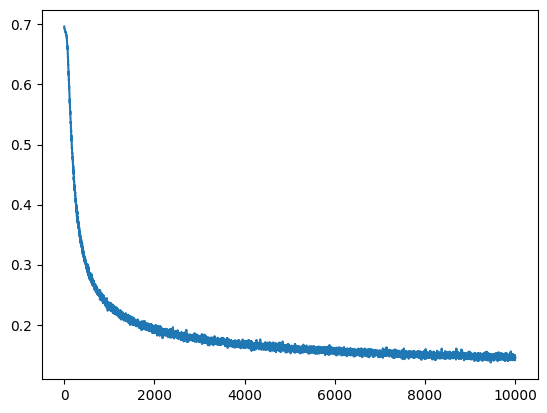

In [50]:
# coding: utf-8

# In[1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# In[2]:
class RankNet(nn.Module):
    def __init__(self, num_feature):
        super(RankNet, self).__init__()

        self.model = nn.Sequential(
            nn.Linear( num_feature, 512),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
#             nn.Sigmoid()
        )
        self.output_sig = nn.Sigmoid()

    def forward(self, input_1,input_2):
        s1 = self.model(input_1)
        s2 = self.model(input_2)

        out = self.output_sig(s1-s2)
        return out
    
    def predict(self, input_):        
        s = self.model(input_)
        return s

# In[12]:
n_sample = 30000
n_feature = 300
data1 = torch.rand((n_sample,n_feature))
data2 = torch.rand((n_sample, n_feature))

y = np.random.random(( n_sample,1))
y = y > 0.9
y = 1. * y
y = torch.Tensor(y)

rank_model = RankNet(num_feature=n_feature)
optimizer = torch.optim.Adam(rank_model.parameters())

loss_fun = torch.nn.BCELoss()

rank_model.cuda()
# optimizer.cuda()
loss_fun.cuda()

data1 = data1.cuda()
data2 = data2.cuda()

y = y.cuda()

# In[13]:
epoch = 10000 ##epoch = 20000
losses = []

for i in range(epoch):
    rank_model.zero_grad()
    y_pred = rank_model(data1, data2)
    loss = loss_fun(y_pred,y)
    
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

    if i % 500 == 0:    
        print('Epoch{}, loss : {}'.format(i, loss.item()))

# In[6]:
import matplotlib.pyplot as plt

# In[7]:
x = list(range(10000))

# In[11]:
plt.plot(x, losses)

In [51]:
#!nvidia-smi

In [52]:
#!pip uninstall torch torchvision torchaudio

In [53]:
#!pip install torch torchvision torchaudio -c pytorch

In [54]:
#!which python

In [55]:
#import torch
#print(torch.__version__)
#print(torch.version.cuda)
#print(torch.cuda.is_available())

Epoch0, loss : 0.6958417296409607
Epoch500, loss : 0.2914566099643707
Epoch1000, loss : 0.23603861033916473
Epoch1500, loss : 0.20682385563850403
Epoch2000, loss : 0.19104896485805511
Epoch2500, loss : 0.1823159158229828
Epoch3000, loss : 0.1750040054321289
Epoch3500, loss : 0.17123521864414215
Epoch4000, loss : 0.17192141711711884
Epoch4500, loss : 0.16712388396263123
Epoch5000, loss : 0.16323693096637726
Epoch5500, loss : 0.15688610076904297
Epoch6000, loss : 0.15410691499710083
Epoch6500, loss : 0.15473906695842743
Epoch7000, loss : 0.15266890823841095
Epoch7500, loss : 0.15097545087337494
Epoch8000, loss : 0.14667092263698578
Epoch8500, loss : 0.15044358372688293
Epoch9000, loss : 0.14781533181667328
Epoch9500, loss : 0.14847202599048615


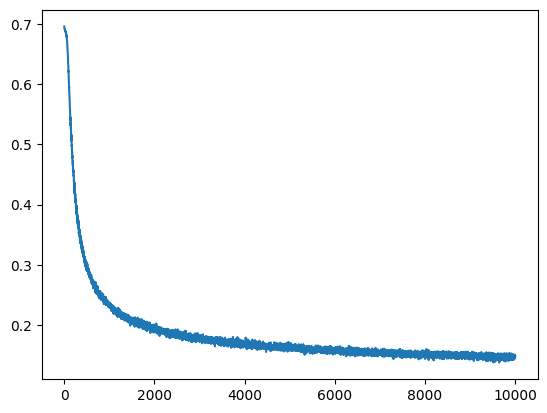

In [56]:
# coding: utf-8

# In[1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# In[2]:
class RankNet(nn.Module):
    def __init__(self, num_feature):
        super(RankNet, self).__init__()

        self.model = nn.Sequential(
            nn.Linear( num_feature, 512),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
#             nn.Sigmoid()
        )
        self.output_sig = nn.Sigmoid()

    def forward(self, input_1,input_2):
        s1 = self.model(input_1)
        s2 = self.model(input_2)

        out = self.output_sig(s1-s2)
        return out
    
    def predict(self, input_):        
        s = self.model(input_)
        return s

# In[12]:
n_sample = 30000
n_feature = 300
data1 = torch.rand((n_sample,n_feature))
data2 = torch.rand((n_sample, n_feature))

y = np.random.random(( n_sample,1))
y = y > 0.9
y = 1. * y
y = torch.Tensor(y)

rank_model = RankNet(num_feature=n_feature)
optimizer = torch.optim.Adam(rank_model.parameters())

loss_fun = torch.nn.BCELoss()

rank_model.cuda()
# optimizer.cuda()
loss_fun.cuda()

data1 = data1.cuda()
data2 = data2.cuda()

y = y.cuda()

# In[13]:
epoch = 10000 ##epoch = 20000
losses = []

for i in range(epoch):
    rank_model.zero_grad()
    y_pred = rank_model(data1, data2)
    loss = loss_fun(y_pred,y)
    
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

    if i % 500 == 0:    
        print('Epoch{}, loss : {}'.format(i, loss.item()))

# In[6]:
import matplotlib.pyplot as plt

# In[7]:
x = list(range(10000))

# In[11]:
plt.plot(x, losses)

In [57]:
##data_sim = similarity.ravel()

##for i in range(104):
##    print(i)
##    df = pd.DataFrame(title[i], sentence_embeddings[i], data_sim)
##print(df)

#flatten a multi-dimensional array into a one-dimensional array
#data_se = sentence_embeddings.ravel()

sentence_embeddings_str = str(sentence_embeddings)
similarity_str = str(similarity)
##df_join = 

#df_title = pd.DataFrame(list(title))
###df_similarity = pd.DataFrame(list(similarity))
#title_join = title.ravel()
#similarity_join = similarity.ravel()

###for title, similarity in ranked_candidates:
    #df_join = pd.concat([list(title), df_similarity], ignore_index=True)
###    df_join = pd.merge([list(title), df_similarity], ignore_index=True)
###    print(f"{title}: {similarity:.4f}")

#job titles, sentence embeddings, similarity scores
#print(sentence_embeddings[0])
#print(type(df))
print(type(sentence_embeddings_str[0]))
print(type(title[0])) #equals A
#print(data_se[i])
print(type(similarity_str))
df_join = title

##for title in ranked_candidates:
    #df_join = title + " " + sentence_embeddings_str[i] + " " + similarity_str
##    df_join = df_join + title #+ tuple(sentence_embeddings_str[i].split(','))
    #print(df_join)

for i in range(104):
    #df_join = df_join + tuple(sentence_embeddings_str[i].split(','))
    df_join = df_join + tuple(sentences[i].split(','))
    #print(df_join)
print(df_join)
#for siminarity in ranked_candidates:
#    df_join = df_join + similarity_str

<class 'str'>
<class 'str'>
<class 'str'>


TypeError: can only concatenate str (not "tuple") to str

In [ ]:
#len(embedding_list)

In [58]:
import pandas as pd
# Example lists
string_list = ['string1', 'string2', 'string3']
embedding_list = [[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]]
numeric_list = [1.0, 2.0, 3.0]
# Create the dataframe
df = pd.DataFrame({ 
  'text': string_list,
  'embedding': embedding_list,
  'score': numeric_list
})
print(df)

      text   embedding  score
0  string1  [0.1, 0.2]    1.0
1  string2  [0.3, 0.4]    2.0
2  string3  [0.5, 0.6]    3.0


In [59]:
sentence_embeddings_list = sentence_embeddings.tolist()

In [60]:
#len(sentence_embeddings_list)

In [61]:
#sentence_embeddings_list #DONT run it is a long list

In [62]:
sentence_embeddings.shape

(105, 768)

In [63]:
sentences.pop()
sentence_embeddings_list.pop()

[0.4868342876434326,
 -0.05931657552719116,
 2.591129779815674,
 0.7334510087966919,
 0.4491172432899475,
 0.5040196180343628,
 0.036357857286930084,
 -0.4399035573005676,
 0.7158058881759644,
 -0.755717396736145,
 -0.42223644256591797,
 0.7808757424354553,
 0.847343921661377,
 0.368243545293808,
 -0.2282804697751999,
 -0.22979576885700226,
 0.18641290068626404,
 -0.4400842785835266,
 0.7816512584686279,
 -1.4328601360321045,
 -0.5990621447563171,
 0.042059991508722305,
 0.8056409955024719,
 -0.793279230594635,
 0.4043252468109131,
 -0.8060815930366516,
 -0.7832256555557251,
 -1.1246637105941772,
 0.10217642784118652,
 0.2555577754974365,
 -0.29714280366897583,
 -0.694273829460144,
 -0.1854742467403412,
 -0.1109161376953125,
 -0.45790284872055054,
 0.5984848141670227,
 0.7212375402450562,
 0.3147584795951843,
 -0.07264755666255951,
 -0.12659376859664917,
 0.6042279005050659,
 0.2375311404466629,
 0.2556297481060028,
 0.6918173432350159,
 -1.0393717288970947,
 -0.27168166637420654,
 -0.

In [64]:
len(sentence_embeddings_list)

104

In [65]:
len(sentences)

104

In [66]:
len(similarity_scores)

104

In [67]:
df_merged = pd.DataFrame({ 
  'text': sentences,
  'embedding': sentence_embeddings_list,
  'score': similarity_scores
})
print(df_merged)

                                                  text  \
0    2019 C.T. Bauer College of Business Graduate (...   
1    Native English Teacher at EPIK (English Progra...   
2                Aspiring Human Resources Professional   
3               People Development Coordinator at Ryan   
4      Advisory Board Member at Celal Bayar University   
..                                                 ...   
99   Aspiring Human Resources Manager | Graduating ...   
100              Human Resources Generalist at Loparex   
101   Business Intelligence and Analytics at Travelers   
102                     Always set them up for Success   
103   Director Of Administration at Excellence Logging   

                                             embedding     score  
0    [-0.8347963690757751, 0.706193208694458, 1.411...  0.497849  
1    [-1.1041529178619385, 0.6818209886550903, 0.48...  0.372279  
2    [0.4692799746990204, 0.2829468548297882, 2.330...  0.927214  
3    [-0.6027140021324158, -0.19602

In [68]:
len(sentences)
len(similarity_scores)

104

In [69]:
len(df_merged.columns)

3

In [70]:
#STOP
# coding: utf-8
# In[1]:

get_ipython().run_line_magic('matplotlib', 'inline')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random

# In[2]:
class RankNet(nn.Module):
    def __init__(self, num_feature):
        super(RankNet, self).__init__()

        self.model = nn.Sequential(
            nn.Linear( num_feature, 768),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(768, 256),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
#             nn.Sigmoid()
        )
        self.output_sig = nn.Sigmoid()

    def forward(self, input_1,input_2):
        s1 = self.model(input_1)
        s2 = self.model(input_2)
        out = self.output_sig(s1-s2)
        return out
    
    def predict(self, input_):
        s = self.model(input_)
        out = self.output_sig(s)
        return out
        #return s

# In[12]:
#n_sample = len(df_merged)
#n_feature = len(df_merged.columns)
#data1 = torch.rand((n_sample,n_feature))
#data2 = torch.rand((n_sample, n_feature))

##y = np.random.random(( n_sample,1))
#score = df_merged['score']
##y = y > 0.9
##y = 1. * y
#score = torch.Tensor(np.score)

# Set correct input feature dimension
rank_model = RankNet(num_feature=768)
rank_model.cuda()

optimizer = torch.optim.Adam(rank_model.parameters())
loss_fun = torch.nn.BCELoss()
#rank_model.cuda()
# optimizer.cuda()
loss_fun.cuda()

#data1 = data1.cuda()
#data2 = data2.cuda()

#score = score.cuda()

# In[13]:
# Training loop
epoch = 5
losses = []

for i in range(epoch):   
    for index, row in df_merged.iterrows():
        # Get item 1
        #item_1 = row['embedding']
        #item_1 = torch.Tensor(item_1)
        #item_1 = item_1.cuda()
        item_1 = torch.Tensor(row['embedding']).unsqueeze(0).cuda()

        # Sample random item 2
        rand = random.randint(0,len(df_merged) - 1)
        #print(rand)
        #print(rand)
        #item_2 = df_merged.iloc[rand]['embedding']
        #item_2 = torch.Tensor(item_2)
        #item_2 = item_2.cuda()
        item_2 = torch.Tensor(df_merged.iloc[rand]['embedding']).unsqueeze(0).cuda()

        # Labels
        score_1 = row['score']
        score_2 = df_merged.iloc[rand]['score']
        #print(score_1, score_2)
        #diff = score_1 - score_2
        #if diff > 0:
        #    y = 1
        #else:
        #    y = 0
        y = torch.FloatTensor([1.0 if score_1 > score_2 else 0.0]).cuda()
        #print("step")
        
        # Training step
        rank_model.zero_grad()
        y_pred = rank_model(item_1, item_2)
        y_pred = y_pred.squeeze(0)
        #print(y_pred, y)#
        loss = loss_fun(y_pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        print(loss.item())#

    # Print last loss of the epoch
    ##if i % 1 == 0:
        #print('Epoch{}, loss : {}'.format(i, losses.item()))
        ##print(f"Epoch {i}, loss: {losses[-1]:.4f}")

# In[6]:
##import matplotlib.pyplot as plt

# In[7]:
##x = list(range(10))

# In[11]:
##plt.plot(x, losses)
print("done")

0.6564010381698608
0.5907996296882629
0.5426918268203735
0.40471020340919495
0.8283815383911133
0.29632848501205444
0.30828163027763367
0.7402824759483337
0.9044904112815857
0.46834999322891235
0.09294962137937546
0.16118988394737244
0.22435720264911652
0.03710636869072914
0.15688550472259521
0.14473123848438263
0.09538771212100983
0.3517038822174072
0.9875094294548035
3.0003833770751953
0.002425809158012271
1.694549798965454
0.002460203366354108
0.007357417140156031
2.218234062194824
3.645756721496582
0.0009436886175535619
0.008936280384659767
0.8703926801681519
0.002427243161946535
0.6083192825317383
0.20905768871307373
0.012747367843985558
0.000795859785284847
1.5175591707229614
0.0053058709017932415
0.09051410853862762
0.09377840906381607
0.02885151468217373
0.08298394083976746
4.574247941491194e-05
0.00010161823593080044
4.3254726733721327e-07
1.202237606048584
1.183580994606018
0.024472549557685852
0.03738854452967644
0.0023174858652055264
2.2762303352355957
0.052439186722040176


In [71]:
for index, row in df_merged.iterrows():
    item = torch.Tensor(row['embedding']).unsqueeze(0).cuda()

    rank_model.eval()
    with torch.no_grad():
        score = rank_model.predict(item)
        df_merged.loc[index, 'score_new'] = score.item()
 
    print(f"Ranking score: {score.item():.4f}")

Ranking score: 0.6752
Ranking score: 0.0000
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.3036
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.9985
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.5564
Ranking score: 0.0000
Ranking score: 0.0027
Ranking score: 0.6752
Ranking score: 0.6752
Ranking score: 0.0000
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.6752
Ranking score: 0.0000
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.3036
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.9985
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.6752
Ranking score: 0.0000
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.3036
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.9985
Ranking score: 1.0000
Ranking score: 1.0000
Ranking score: 0.5564
Ranking score: 0.0000
Ranking score: 0.0027
Ranking score: 0.6752
Ranking score: 0.0000
Ranking sc

In [72]:
df_merged.head()

,text,embedding,score,score_new
0,2019 C.T. Bauer College of Business Graduate (...,"[-0.8347963690757751, 0.706193208694458, 1.411...",0.497849,6.752175e-01
1,Native English Teacher at EPIK (English Progra...,"[-1.1041529178619385, 0.6818209886550903, 0.48...",0.372279,9.575822e-07
2,Aspiring Human Resources Professional,"[0.4692799746990204, 0.2829468548297882, 2.330...",0.927214,1.000000e+00
3,People Development Coordinator at Ryan,"[-0.6027140021324158, -0.19602473080158234, 1....",0.705831,9.999944e-01
4,Advisory Board Member at Celal Bayar University,"[-0.055477581918239594, -0.19447235763072968, ...",0.463202,3.036044e-01


In [73]:
##for index, row in df_merged.iterrows():
    #item = torch.Tensor(row['embedding']).unsqueeze(0).cuda()
    ##df_merged.loc[index, 'score_new'] = score.item()
    #new_list = sorted(df_merged['score_new'])
    #new_list = df_merged['score_new']
    ##new_list = score.item()
    ##print(new_list)
##print(sorted(df_merged['score_new']))


#df_sorted = df_merged
#df_sorted = df_sorted.sort_values(by='score_new', ascending=True)
df_sorted = df_merged.sort_values(by='score_new', ascending=True)
#print(df_sorted['score_new'])
print(df_sorted)
#df_sorted.head()

#print(df_merged.iloc[-1])

                                                 text  \
86  Bachelor of Science in Biology from Victoria U...   
1   Native English Teacher at EPIK (English Progra...   
15  Native English Teacher at EPIK (English Progra...   
44  Native English Teacher at EPIK (English Progra...   
19  Native English Teacher at EPIK (English Progra...   
..                                                ...   
29              Seeking Human Resources Opportunities   
45              Aspiring Human Resources Professional   
81  Aspiring Human Resources Professional | An ene...   
5                 Aspiring Human Resources Specialist   
23                Aspiring Human Resources Specialist   

                                            embedding     score     score_new  
86  [0.1361631602048874, 0.3713434934616089, -0.35...  0.086293  3.186329e-10  
1   [-1.1041529178619385, 0.6818209886550903, 0.48...  0.372279  9.575822e-07  
15  [-1.1041529178619385, 0.6818209886550903, 0.48...  0.372279  9.575822e-